In [33]:
#!pip install -U dataprep



In [98]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from dataprep.clean import clean_text
from dataprep.clean import clean_date
from dataprep.clean import clean_headers
import pandas as pd 
import numpy as np
from dataprep.clean import clean_email
from dataprep.clean import clean_df
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import joblib

In [50]:
df = load_dataset("titanic")


In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
#create_report(df)

# Column Headers 

In [51]:
df = pd.DataFrame(
        {
            "ISBN": [9781455582341],
            "isbn": [1455582328],
            "bookTitle": ["How Google Works"],
            "__Author": ["Eric Schmidt, Jonathan Rosenberg"],
            "Publication (year)": [2014],
            "éditeur": ["Grand Central Publishing"],
            "Number_Of_Pages": [305],
            "★ Rating": [4.06],
        }
    )
df

,ISBN,isbn,bookTitle,__Author,Publication (year),éditeur,Number_Of_Pages,★ Rating
0,9781455582341,1455582328,How Google Works,"Eric Schmidt, Jonathan Rosenberg",2014,Grand Central Publishing,305,4.06


In [53]:
clean_headers(df)


Column Headers Cleaning Report:
	8 values cleaned (100.0%)


,isbn,isbn_1,book_title,author,publication_year,editeur,number_of_pages,rating
0,9781455582341,1455582328,How Google Works,"Eric Schmidt, Jonathan Rosenberg",2014,Grand Central Publishing,305,4.06


In [54]:
clean_headers(df, case="kebab")


Column Headers Cleaning Report:
	8 values cleaned (100.0%)


,isbn,isbn-1,book-title,author,publication-year,editeur,number-of-pages,rating
0,9781455582341,1455582328,How Google Works,"Eric Schmidt, Jonathan Rosenberg",2014,Grand Central Publishing,305,4.06


In [55]:
clean_headers(df, case="const")


Column Headers Cleaning Report:
	7 values cleaned (87.5%)


,ISBN,ISBN_1,BOOK_TITLE,AUTHOR,PUBLICATION_YEAR,EDITEUR,NUMBER_OF_PAGES,RATING
0,9781455582341,1455582328,How Google Works,"Eric Schmidt, Jonathan Rosenberg",2014,Grand Central Publishing,305,4.06


# date strings

In [56]:
df = pd.DataFrame({"date":
                   ['1996.07.10 AD at 15:08:56 PDT',
                    'Thu Sep 25 10:36:28 2003',
                    'Thu Sep 25 10:36:28 BRST 2003',
                    '2003 10:36:28 BRST 25 Sep Thu',
                    'Thu Sep 25 10:36:28 2003',
                    'Thu 10:36:28',
                    'Thu 10:36',
                    '10:36',
                    'Thu Sep 25 2003',
                    'Sep 25 2003',
                    'Sep 2003',
                    'Sep',
                    '2003',
                    '2003-09-25',
                    '2003-Sep-25',
                    '25-Sep-2003',
                    'Sep-25-2003',
                    '09-25-2003',
                    '10-09-2003',
                    '10-09-03',
                    '2003.Sep.25',
                    '2003/09/25',
                    '2003 Sep 25',
                    '2003 09 25',
                    '10pm',
                    '12:00am',
                    'Sep 03',
                    'Sep of 03',
                    'Wed, July 10, 96',
                    '1996.07.10 AD at 15:08:56 PDT',
                    'Tuesday, April 12, 1952 AD 3:30:42pm PST',
                    'November 5, 1994, 8:15:30 am EST',
                    '3rd of May 2001',
                    '5:50 AM on June 13, 1990',
                    'NULL',
                    'nan',
                    'I\'m a little cat',
                    'This is Sep.']})
df

,date
0,1996.07.10 AD at 15:08:56 PDT
1,Thu Sep 25 10:36:28 2003
2,Thu Sep 25 10:36:28 BRST 2003
3,2003 10:36:28 BRST 25 Sep Thu
4,Thu Sep 25 10:36:28 2003
5,Thu 10:36:28
6,Thu 10:36
7,10:36
8,Thu Sep 25 2003
9,Sep 25 2003


In [57]:
clean_df =  clean_date(df, 'date')

/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

Dates Cleaning Report:
	34 values cleaned (89.47%)
	2 values unable to be parsed (5.26%), set to NaN
Result contains 34 (89.47%) values in the correct format and 4 null values (10.53%)


In [58]:
clean_df

,date,date_clean
0,1996.07.10 AD at 15:08:56 PDT,1996-07-10 15:08:56
1,Thu Sep 25 10:36:28 2003,2003-09-25 10:36:28
2,Thu Sep 25 10:36:28 BRST 2003,2003-09-25 10:36:28
3,2003 10:36:28 BRST 25 Sep Thu,2003-09-25 10:36:28
4,Thu Sep 25 10:36:28 2003,2003-09-25 10:36:28
5,Thu 10:36:28,2000-01-01 10:36:28
6,Thu 10:36,2000-01-01 10:36:00
7,10:36,2000-01-01 10:36:00
8,Thu Sep 25 2003,2003-09-25 00:00:00
9,Sep 25 2003,2003-09-25 00:00:00


## Email Addresses
 

In [59]:
df = pd.DataFrame({
    "email": [
        "yi@gmali.com", "yi@sfu.ca", "y i@sfu.ca", "Yi@gmail.com",
        "H ELLO@hotmal.COM", "hello", np.nan, "NULL"
    ]
})
df

,email
0,yi@gmali.com
1,yi@sfu.ca
2,y i@sfu.ca
3,Yi@gmail.com
4,H ELLO@hotmal.COM
5,hello
6,NaN
7,NULL


In [60]:
clean_email(df, "email")

/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

email Cleaning Report:
	1 values cleaned (12.5%)
	3 values unable to be parsed (37.5%), set to NaN
Result contains 3 (37.5%) values in the correct format and 5 null values (62.5%)


,email,email_clean
0,yi@gmali.com,yi@gmali.com
1,yi@sfu.ca,yi@sfu.ca
2,y i@sfu.ca,NaN
3,Yi@gmail.com,yi@gmail.com
4,H ELLO@hotmal.COM,NaN
5,hello,NaN
6,NaN,NaN
7,NULL,NaN


In [61]:
clean_email(df, "email", fix_domain=True)


/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

email Cleaning Report:
	2 values cleaned (25.0%)
	3 values unable to be parsed (37.5%), set to NaN
Result contains 3 (37.5%) values in the correct format and 5 null values (62.5%)


,email,email_clean
0,yi@gmali.com,yi@gmail.com
1,yi@sfu.ca,yi@sfu.ca
2,y i@sfu.ca,NaN
3,Yi@gmail.com,yi@gmail.com
4,H ELLO@hotmal.COM,NaN
5,hello,NaN
6,NaN,NaN
7,NULL,NaN


In [63]:
clean_email(df, "email", remove_whitespace=True, fix_domain=True)


/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

email Cleaning Report:
	3 values cleaned (37.5%)
	1 values unable to be parsed (12.5%), set to NaN
Result contains 5 (62.5%) values in the correct format and 3 null values (37.5%)


,email,email_clean
0,yi@gmali.com,yi@gmail.com
1,yi@sfu.ca,yi@sfu.ca
2,y i@sfu.ca,yi@sfu.ca
3,Yi@gmail.com,yi@gmail.com
4,H ELLO@hotmal.COM,hello@hotmail.com
5,hello,NaN
6,NaN,NaN
7,NULL,NaN


# Text

In [66]:
df = pd.DataFrame(
    {
        "text": [
            "'ZZZZZ!' If IMDb would allow one-word reviews, that's what mine would be.",
            "The cast played Shakespeare.<br /><br />Shakespeare lost.",
            "Simon of the Desert (Simón del desierto) is a 1965 film directed by Luis Buñuel.",
            "[SPOILERS]\nI don't think I've seen a film this bad before {acting, script, effects (!), etc...}",
            "<a href='/festivals/cannes-1968-a-video-essay'>Cannes 1968:\tA video essay</a>",
            "Recap thread for @RottenTomatoes excellent panel, hosted by @ErikDavis with @FilmFatale_NYC and @AshCrossan.",
            "#GameOfThrones: Season 8 is #Rotten at 54% on the #Tomatometer.  But does it deserve to be?",
            "Come join and share your thoughts on this week's episode: https://twitter.com/i/spaces/1fake2URL3",
            123,
            np.nan,
            "NULL",
        ]
    }
)
df

,text
0,"'ZZZZZ!' If IMDb would allow one-word reviews,..."
1,The cast played Shakespeare.<br /><br />Shakes...
2,Simon of the Desert (Simón del desierto) is a ...
3,[SPOILERS]\nI don't think I've seen a film thi...
4,<a href='/festivals/cannes-1968-a-video-essay'...
5,Recap thread for @RottenTomatoes excellent pan...
6,#GameOfThrones: Season 8 is #Rotten at 54% on ...
7,Come join and share your thoughts on this week...
8,123
9,NaN


In [67]:
clean_text(df, "text")

/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (

,text
0,zzzzz imdb would allow one word reviews mine w...
1,cast played shakespeare shakespeare lost
2,simon desert simon del desierto film directed ...
3,spoilers think seen film bad acting script eff...
4,cannes video essay
5,recap thread rottentomatoes excellent panel ho...
6,gameofthrones season rotten tomatometer deserve
7,come join share thoughts week episode
8,
9,NaN


In [68]:


clean_text(df, "text", stopwords={"imdb", "film"})

/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (

,text
0,zzzzz if would allow one word reviews that s w...
1,the cast played shakespeare shakespeare lost
2,simon of the desert simon del desierto is a di...
3,spoilers i don t think i ve seen a this bad be...
4,cannes a video essay
5,recap thread for rottentomatoes excellent pane...
6,gameofthrones season is rotten at on the tomat...
7,come join and share your thoughts on this week...
8,
9,NaN


Bad pipe message: %s [b"\x00\xc6\xaaf\xee\x05\x90\xd1}\x91\r\x96^\xe6\n\xb8\x95\x85 m\xef\x15OSB\xcaJ7Q'P\xce\xc7"]
Bad pipe message: %s [b'\x0e\xa9\x9e\x9a\xa7\x81\xb9\xc0\x9c\x05;\xedv\x05\xbfw\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01']
Bad pipe message: %s [b'\xae\x82\nS"eo\xd8\xfe\x0c\xd5\xdc\x90\xee\xe9\xf4X\xfa\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x005\xc0\x13\xc0\t\x003\x002\x001\x000\xc0\x0e\xc0\x04\x00/\x00\x9a\x00\x99\x00\x98\x00\x97\x00\x96\x00\x07\xc0\x11\xc0\x07\xc0\x0c\xc0\x02\x00\x05\x00\x04\x00\xff\x02']
Bad pipe message: %s [b'\xbc`\t\x14Tg\xdf\x11\xe7g\x9f,\xbch\xcc\xfa"\n \xba\xad\x17\x10\x19\xa9\xd0\x93Rsy\x06\xf7l\xc1\xd6!o\

# US Street Addresses


In [69]:
df = pd.DataFrame(
    {
        "address": [
            "123 Pine Ave.",
            "main st",
            "1234 west main heights 57033",
            "apt 1 789 s maple rd manhattan",
            "robie house, 789 north main street",
            "1111 S Figueroa St, Los Angeles, CA 90015",
            "(staples center) 1111 S Figueroa St, Los Angeles",
            "hello",
            np.nan,
            "NULL"
        ]
    }
)
df

,address
0,123 Pine Ave.
1,main st
2,1234 west main heights 57033
3,apt 1 789 s maple rd manhattan
4,"robie house, 789 north main street"
5,"1111 S Figueroa St, Los Angeles, CA 90015"
6,"(staples center) 1111 S Figueroa St, Los Angeles"
7,hello
8,NaN
9,NULL


In [70]:
from dataprep.clean import clean_address
clean_address(df, "address")

/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

Address Cleaning Report:
	5 values cleaned (50.0%)
	2 values unable to be parsed (20.0%), set to NaN
Result contains 6 (60.0%) values in the correct format and 4 null values (40.0%)


,address,address_clean
0,123 Pine Ave.,123 Pine Ave.
1,main st,NaN
2,1234 west main heights 57033,"1234 W. Main Hts., 57033"
3,apt 1 789 s maple rd manhattan,"789 S. Maple Rd., Apt 1, Manhattan"
4,"robie house, 789 north main street",(Robie House) 789 N. Main St.
5,"1111 S Figueroa St, Los Angeles, CA 90015","1111 S. Figueroa St., Los Angeles, CA 90015"
6,"(staples center) 1111 S Figueroa St, Los Angeles","(Staples Center) 1111 S. Figueroa St., Los Ang..."
7,hello,NaN
8,NaN,NaN
9,NULL,NaN


In [71]:
clean_address(
    df, "address", must_contain=("house_number", "zipcode")
)


/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/8 [00:00<?, ?it/s]

Address Cleaning Report:
	2 values cleaned (20.0%)
	6 values unable to be parsed (60.0%), set to NaN
Result contains 2 (20.0%) values in the correct format and 8 null values (80.0%)


,address,address_clean
0,123 Pine Ave.,NaN
1,main st,NaN
2,1234 west main heights 57033,"1234 W. Main Hts., 57033"
3,apt 1 789 s maple rd manhattan,NaN
4,"robie house, 789 north main street",NaN
5,"1111 S Figueroa St, Los Angeles, CA 90015","1111 S. Figueroa St., Los Angeles, CA 90015"
6,"(staples center) 1111 S Figueroa St, Los Angeles",NaN
7,hello,NaN
8,NaN,NaN
9,NULL,NaN


In [72]:
clean_address(df, "address", split=True)


/home/codespace/.python/current/lib/python3.10/site-packages/dask/dataframe/core.py:6799: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


  0%|          | 0/16 [00:00<?, ?it/s]

Address Cleaning Report:
	6 values cleaned (60.0%)
	2 values unable to be parsed (20.0%), set to NaN
Result contains 6 (60.0%) values in the correct format and 4 null values (40.0%)


,address,building,house_number,street_prefix_abbr,street_name,street_suffix_abbr,apartment,city,state_abbr,zipcode
0,123 Pine Ave.,NaN,123,NaN,Pine,Ave.,NaN,NaN,NaN,NaN
1,main st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1234 west main heights 57033,NaN,1234,W.,Main,Hts.,NaN,NaN,NaN,57033
3,apt 1 789 s maple rd manhattan,NaN,789,S.,Maple,Rd.,Apt 1,Manhattan,NaN,NaN
4,"robie house, 789 north main street",Robie House,789,N.,Main,St.,NaN,NaN,NaN,NaN
5,"1111 S Figueroa St, Los Angeles, CA 90015",NaN,1111,S.,Figueroa,St.,NaN,Los Angeles,CA,90015
6,"(staples center) 1111 S Figueroa St, Los Angeles",Staples Center,1111,S.,Figueroa,St.,NaN,Los Angeles,NaN,NaN
7,hello,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NULL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DataFrame

In [73]:
df = pd.DataFrame({"Name":
                   ["Abby", "Scott", "Scott", "Scott2", np.nan, "NULL"],
                   "AGE":
                   [12, 33, 33, 56,  np.nan, "NULL"],
                   "weight__":
                   [32.5, 47.1, 47.1, 55.2, np.nan, "NULL"],
                   "Admission Date":
                   ["2020-01-01", "2020-01-15", "2020-01-15",
                    "2020-09-01", pd.NaT, "NULL"],
                   "email_address":
                   ["abby@gmail.com","scott@gmail.com", "scott@gmail.com", "test@abc.com", np.nan, "NULL"],
                   "Country of Birth":
                   ["CA","Canada", "Canada", "NULL", np.nan, "NULL"],
                   "Contact (Numbers)":
                   ["1-789-456-0123","1-123-456-7890","1-123-456-7890","1-456-123-7890", np.nan, "NULL" ],

})
df

,Name,AGE,weight__,Admission Date,email_address,Country of Birth,Contact (Numbers)
0,Abby,12,32.5,2020-01-01,abby@gmail.com,CA,1-789-456-0123
1,Scott,33,47.1,2020-01-15,scott@gmail.com,Canada,1-123-456-7890
2,Scott,33,47.1,2020-01-15,scott@gmail.com,Canada,1-123-456-7890
3,Scott2,56,55.2,2020-09-01,test@abc.com,NULL,1-456-123-7890
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5,NULL,NULL,NULL,NULL,NULL,NULL,NULL


In [74]:
inferred_dtypes, cleaned_df = clean_df(df)

Data Type Detection Report:
	These data types are supported by DataPrep to clean: ['email', 'phone', 'country']
Column Headers Cleaning Report:
	6 values cleaned (85.71%)
Downcast Memory Report:
	Memory reducted from 1945 to 1879. New size: (96.61%)


In [75]:
inferred_dtypes

,semantic_data_type,atomic_data_type
Name,string,string
AGE,integer,integer
weight__,floating,floating
Admission Date,string,string
email_address,email,string
Country of Birth,country,string
Contact (Numbers),phone,string


In [84]:
cleaned_df['weight'].values[-1]

,name,age,weight,admission_date,email_address,country_of_birth,contact_numbers
0,Abby,12,32.5,2020-01-01,abby@gmail.com,CA,1-789-456-0123
1,Scott,33,47.099998,2020-01-15,scott@gmail.com,Canada,1-123-456-7890
2,Scott,33,47.099998,2020-01-15,scott@gmail.com,Canada,1-123-456-7890
3,Scott2,56,55.200001,2020-09-01,test@abc.com,<NA>,1-456-123-7890
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [85]:
cleaned_df.to_csv('../data/other/df_cleaned.csv', index=False)

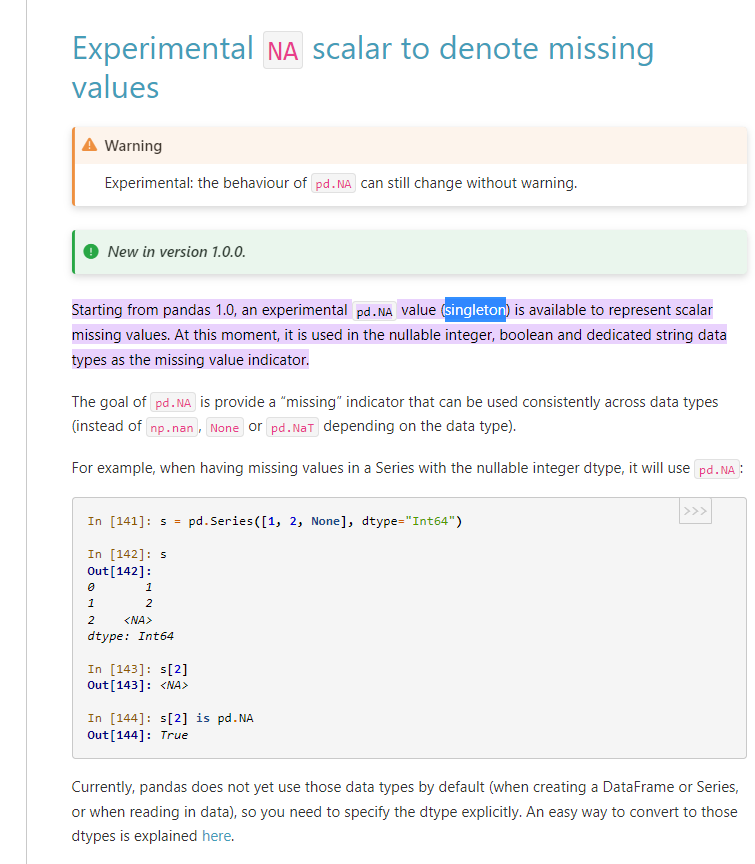

In [ ]:
# Data imputation 



In [87]:

# Create a sample dataframe with missing values
np.random.seed(0)
rows = 100
cols = 10
df = pd.DataFrame(np.random.randn(rows, cols), columns=['col_' + str(i) for i in range(cols)])
df.iloc[0:20, 3:7] = np.nan



In [88]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,1.764052,0.400157,0.978738,NaN,NaN,NaN,NaN,-0.151357,-0.103219,0.410599
1,0.144044,1.454274,0.761038,NaN,NaN,NaN,NaN,-0.205158,0.313068,-0.854096
2,-2.552990,0.653619,0.864436,NaN,NaN,NaN,NaN,-0.187184,1.532779,1.469359
3,0.154947,0.378163,-0.887786,NaN,NaN,NaN,NaN,1.202380,-0.387327,-0.302303
4,-1.048553,-1.420018,-1.706270,NaN,NaN,NaN,NaN,0.777490,-1.613898,-0.212740
...,...,...,...,...,...,...,...,...,...,...
95,-0.947489,0.244443,1.401345,-0.410382,0.528944,0.246148,0.863520,-0.804754,2.346647,-1.279161
96,-0.365551,0.938093,0.296733,0.829986,-0.496102,-0.074805,0.012232,1.569260,0.690429,0.796672
97,-0.657926,0.968883,0.225582,1.389145,2.014060,-0.306766,-0.406303,-0.864045,-0.143580,-0.382025
98,0.359504,-0.144567,-0.361599,1.064585,-0.937880,0.433108,-0.405942,0.724369,1.385262,-0.303098


In [ ]:
# Use the fillna() method to impute missing values
# Here, we'll replace missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Verify that the missing values have been imputed
print(df.head(25))


In [90]:


imp = SimpleImputer(strategy='mean')

# Fit the imputer and transform the data
df_imputed = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

imp

SimpleImputer()

In [92]:



imp = SimpleImputer(strategy='mean')
pipe = Pipeline([('imputer', imp)])

# Fit the pipeline and transform the data
df_imputed = pipe.fit_transform(df)

# Convert the array back to a dataframe
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Verify that the missing values have b

In [93]:
# Save the imputer 
joblib.dump(imp, '../artifacts/imputer.pkl')
# save the pipeline
joblib.dump(pipe, '../artifacts/pipeline.pkl')


['../artifacts/pipeline.pkl']

In [94]:
# load the imputer
imp = joblib.load('../artifacts/imputer.pkl')
# load the pipeline
pipe = joblib.load('../artifacts/pipeline.pkl')

In [97]:
df.values =  pipe.transform(df)

/tmp/ipykernel_1968/2490910462.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.values =  pipe.transform(df)


AttributeError: can't set attribute 'values'